In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from google.colab import files
uploaded = files.upload()

Saving crimedata_simplified.xlsx to crimedata_simplified (1).xlsx


In [60]:
dff1 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "IPC", usecols=lambda x: 'Unnamed' not in x)

In [61]:
df1 = dff1.copy()

In [62]:
dff2 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "women", usecols=lambda x: 'Unnamed' not in x)
df2 = dff2.copy()

In [63]:
dff3 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "ndps", usecols=lambda x: 'Unnamed' not in x)
df3 = dff3.copy()

In [65]:
dff4 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "brothels", usecols=lambda x: 'Unnamed' not in x)
df4 = dff4.copy()

In [66]:
dff5 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "ecconomic_offenses", usecols=lambda x: 'Unnamed' not in x)
df5 = dff5.copy()

In [67]:
dff6 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "cyber", usecols=lambda x: 'Unnamed' not in x)
df6 = dff6.copy()

IPC CRIMES

In [68]:
df1.head()

,Crime Heads,sep25_R,sep25_D,aug25_R,aug_25_D,this_yr_R,this_yr_D,% of Detection_this,prev_yr_R,prev_yr_D,% of Detection_prev
0,Murder,11,11,6,6,98,95,97,78,77,99
1,Att.to.C.Murder,31,29,16,16,232,229,99,240,238,99
2,Dacoity,1,1,1,0,9,9,100,19,19,100
3,Prep.for Dacoity,0,0,0,0,2,2,100,8,8,100
4,Robbery,27,23,23,22,204,200,98,398,391,98


In [69]:
df1["change_R"] = df1["sep25_R"] - df1["aug25_R"]

In [70]:
cols = df1.select_dtypes(include = ['object']).columns
for col in cols:
  df1[col] = df1[col].str.strip()

In [71]:
df1 = df1.drop(18, axis = 0)

In [72]:
df1.sort_values(by = 'sep25_R', ascending = False, inplace = True)

In [73]:
df1 = df1.drop(17, axis = 0)

In [74]:
df1.reset_index(inplace = True)

In [75]:
df1.drop(columns = 'index', inplace = True)

In [76]:
df1.sort_values(by = 'change_R', ascending = False, inplace = True)

In [77]:
df1['R/D'] = df1['sep25_D']/df1['sep25_R']

In [78]:
df1.sort_values(by = 'R/D', ascending = False, inplace = True)

In [79]:
df1['Diff_this_prev'] = df1['this_yr_R']/df1['this_yr_D'] - df1['prev_yr_R']/df1['prev_yr_D']

In [80]:
df1.sort_values(by = 'Diff_this_prev', ascending = False, inplace = True)

In [81]:
total_cases = df1["sep25_R"].sum()
total_detected = df1["sep25_D"].sum()
overall_rate = (total_detected / total_cases) * 100
print("Overall detection rate (Sep 2025):", round(overall_rate, 2), "%")

Overall detection rate (Sep 2025): 51.04 %


In [82]:
total_cases_prev = df1["aug25_R"].sum()
total_detected_prev = df1["aug_25_D"].sum()
overall_rate_prev = (total_detected_prev / total_cases_prev) * 100
print("Overall detection rate (Aug 2025):", round(overall_rate_prev, 2), "%")

Overall detection rate (Aug 2025): 49.62 %


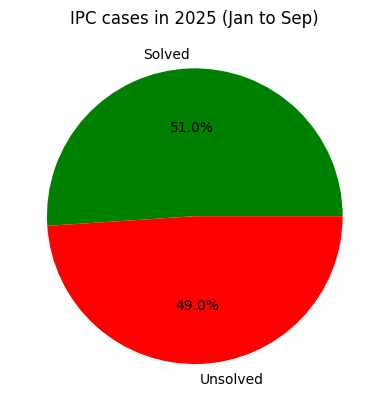

In [83]:
plt.pie([total_detected, total_cases - total_detected], labels = ["Solved", "Unsolved"],autopct='%1.1f%%', colors = ["green", "red"])
plt.title("IPC cases in 2025 (Jan to Sep)")
plt.show()

In [84]:
top_det = df1.sort_values("% of Detection_this", ascending=False).head(5)
print(top_det[["Crime Heads", "% of Detection_this"]])

         Crime Heads  % of Detection_this
14           Dacoity                  100
16  Prep.for Dacoity                  100
7    Att.to.C.Murder                   99
1               Hurt                   98
9            Robbery                   98


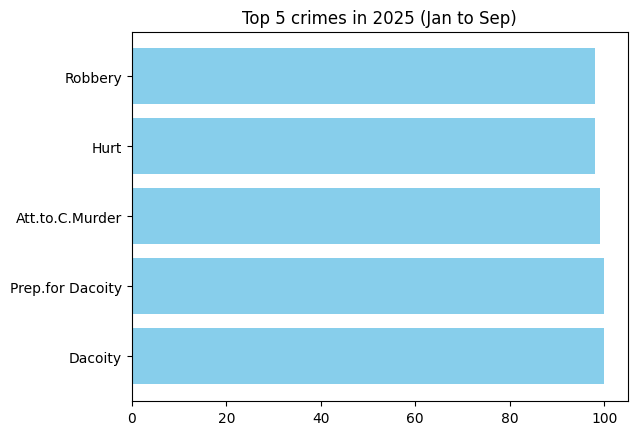

In [85]:
plt.barh(top_det['Crime Heads'], top_det['% of Detection_this'], color = 'skyblue')
plt.title("Top 5 crimes in 2025 (Jan to Sep)")
plt.show()

In [86]:
low_det = df1.sort_values("% of Detection_this").head(5)
print(low_det[["Crime Heads", "% of Detection_this"]])

     Crime Heads  % of Detection_this
0        Thefts.                   32
2    M.V.Thefts.                   58
5   H.B.T.Night.                   64
11     H.B.T.Day                   64
12     Snatching                   83


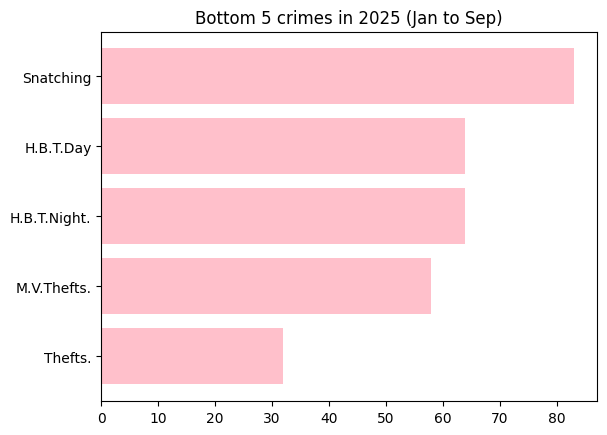

In [87]:
plt.barh(low_det['Crime Heads'], low_det['% of Detection_this'], color = 'pink')
plt.title("Bottom 5 crimes in 2025 (Jan to Sep)")
plt.show()

In [90]:
df1["share"] = (df1["sep25_R"] / df1["sep25_R"].sum()) * 100

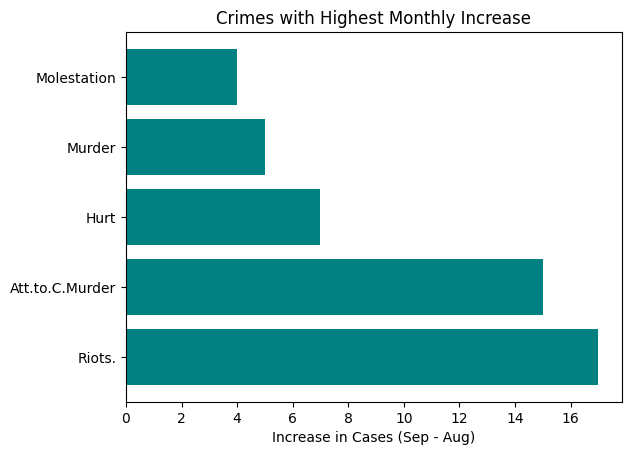

In [91]:
top_inc = df1.sort_values("change_R", ascending=False).head(5)
plt.barh(top_inc["Crime Heads"], top_inc["change_R"], color="teal")
plt.xlabel("Increase in Cases (Sep - Aug)")
plt.title("Crimes with Highest Monthly Increase")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

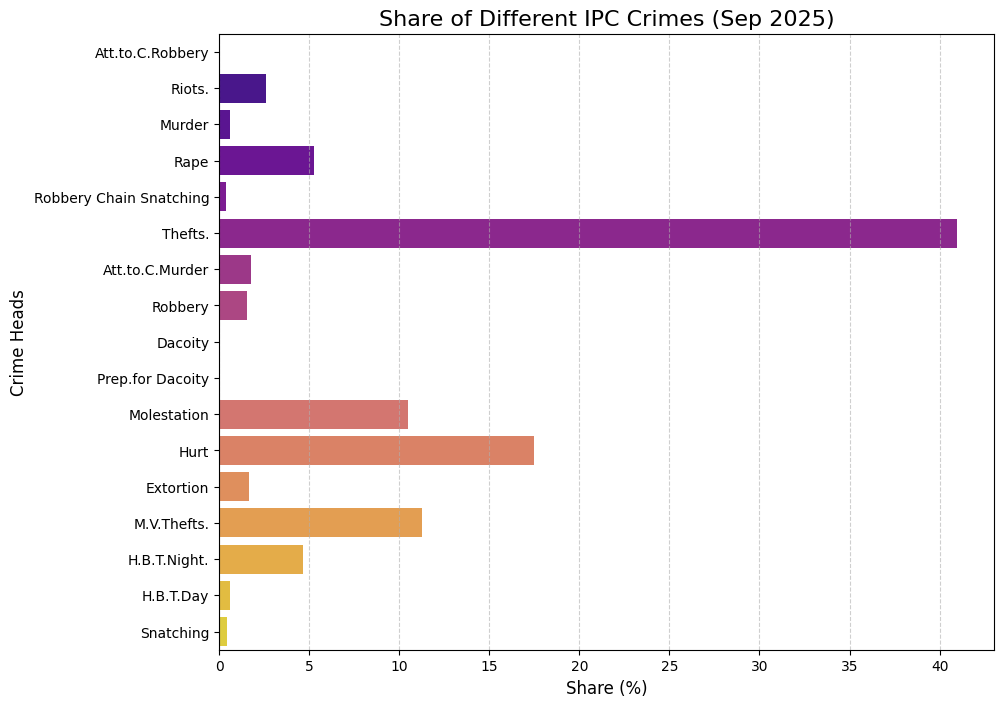

In [93]:
plt.figure(figsize=(10, 8))
sns.barplot(x="share", y="Crime Heads", data=df1, palette="plasma", hue="Crime Heads", legend=False)
plt.title("Share of Different IPC Crimes (Sep 2025)", fontsize=16)
plt.xlabel("Share (%)", fontsize=12)
plt.ylabel("Crime Heads", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
from google.colab import files
ipc_crimes_img = 'ipc.png'
plt.savefig(ipc_crimes_img)
files.download(ipc_crimes_img)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

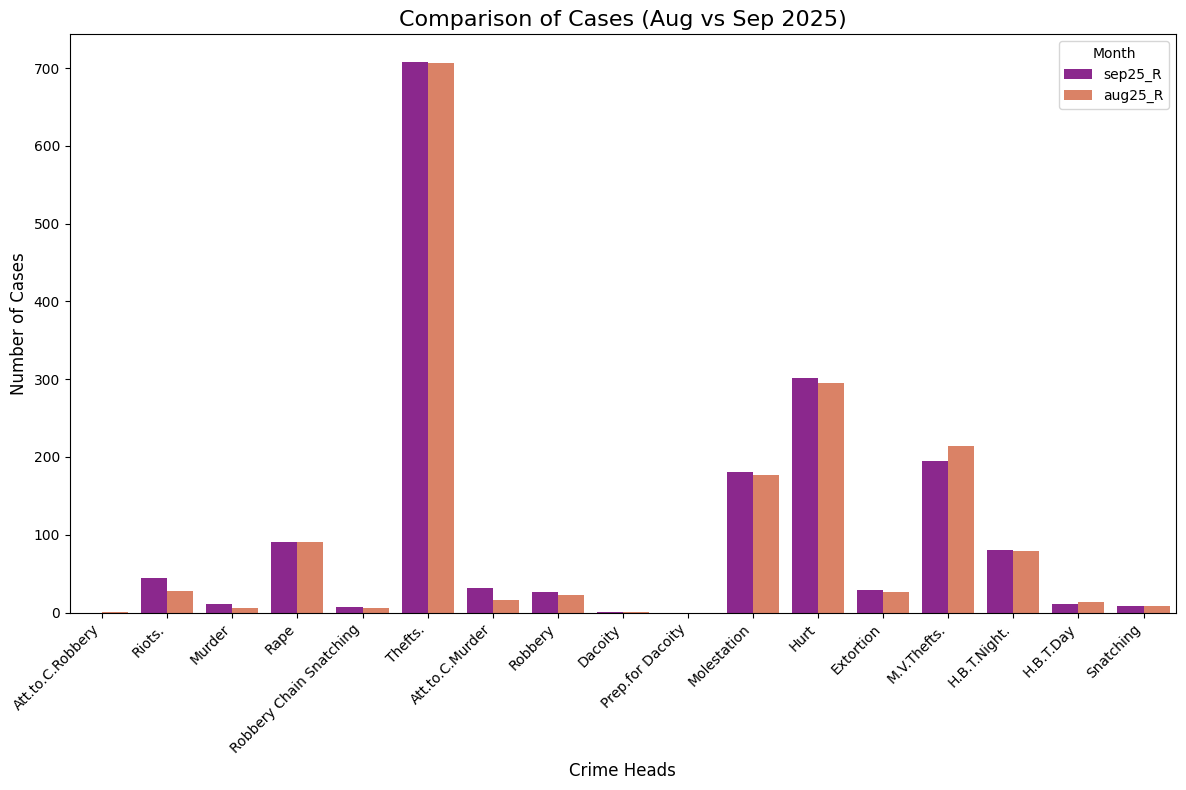

In [106]:
df1_comparison = df1[['Crime Heads', 'sep25_R', 'aug25_R']].melt('Crime Heads', var_name='Month', value_name='Number of Cases')

plt.figure(figsize=(12, 8))
sns.barplot(x='Crime Heads', y='Number of Cases', palette = 'plasma', hue='Month', data=df1_comparison)
plt.title('Comparison of Cases (Aug vs Sep 2025)', fontsize=16)
plt.xlabel('Crime Heads', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
from google.colab import files
ipc_comp = 'ipc_comp.png'
plt.savefig(ipc_comp)
files.download(ipc_comp)
plt.show()

Crimes related to women

In [14]:
df2 = df2.fillna(0)

In [16]:
df2.sort_values(by = 'sep25_R', ascending = False, inplace = True)

In [19]:
df2['Unsolved_S'] = df2['sep25_R'] - df2['sep25_D']

In [21]:
df2['Unsolved_A'] = df2['aug25_R'] - df2['aug25_D']

In [23]:
df2['sep_aug_unsolved_diff'] = df2['Unsolved_S'] - df2['Unsolved_A']

In [25]:
df2.sort_values(by = 'sep_aug_unsolved_diff', ascending = False, inplace = True)

In [28]:
total_cases_w = df2["sep25_R"].sum()
total_detected_w = df2["sep25_D"].sum()
overall_rate_w = (total_detected_w / total_cases_w) * 100
print("Overall detection rate (Sep 2025):", round(overall_rate_w, 2), "%")

Overall detection rate (Sep 2025): 77.69 %


In [30]:
total_cases_wa = df2["aug25_R"].sum()
total_detected_wa = df2["aug25_D"].sum()
overall_rate_wa = (total_detected_wa / total_cases_wa) * 100
print("Overall detection rate (Aug 2025):", round(overall_rate_wa, 2), "%")

Overall detection rate (Aug 2025): 74.61 %


In [32]:
df2['this_prev_det'] = df2['% of Det_this'] - df2['% of Det_prev']

In [34]:
df2.sort_values(by = 'this_prev_det', ascending=False, inplace=True)

In [38]:
df2["share"] = (df2["sep25_R"] / df2["sep25_R"].sum()) * 100


In [40]:
df2.sort_values(by = 'share', ascending = False, inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

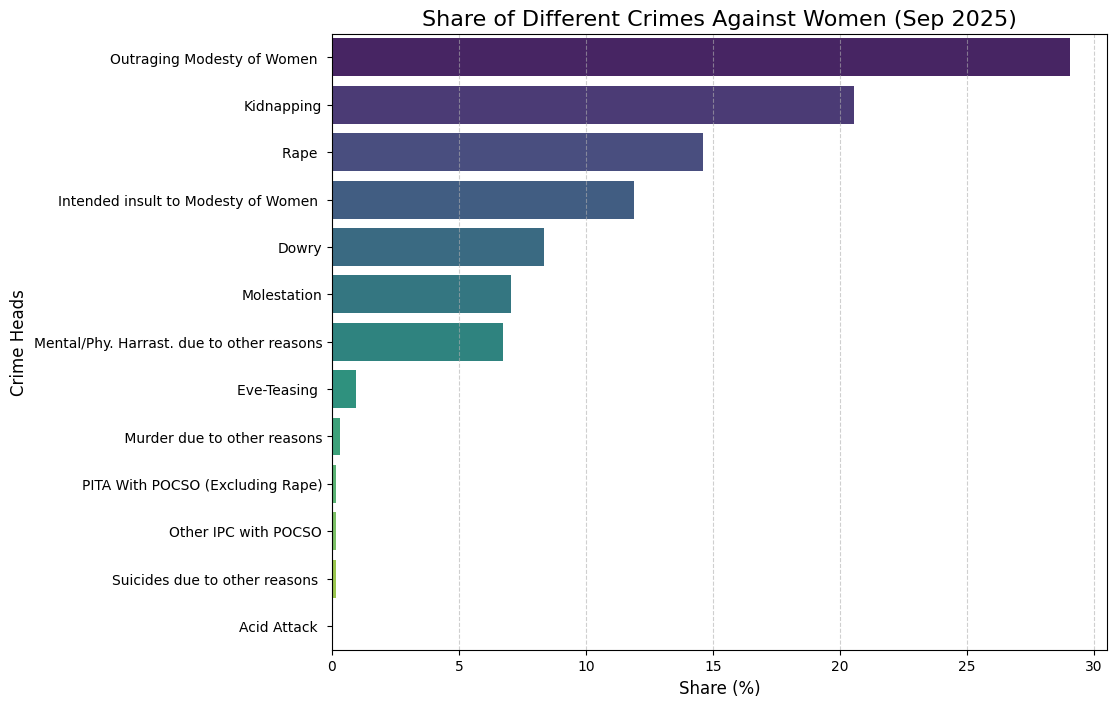

In [56]:
plt.figure(figsize=(10, 8))
sns.barplot(x="share", y="Crime Heads", data=df2, palette="viridis", hue="Crime Heads")
plt.title("Share of Different Crimes Against Women (Sep 2025)", fontsize=16)
plt.xlabel("Share (%)", fontsize=12)
plt.ylabel("Crime Heads", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
from google.colab import files
women_crimes_img = 'women.png'
files.download(women_crimes_img)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

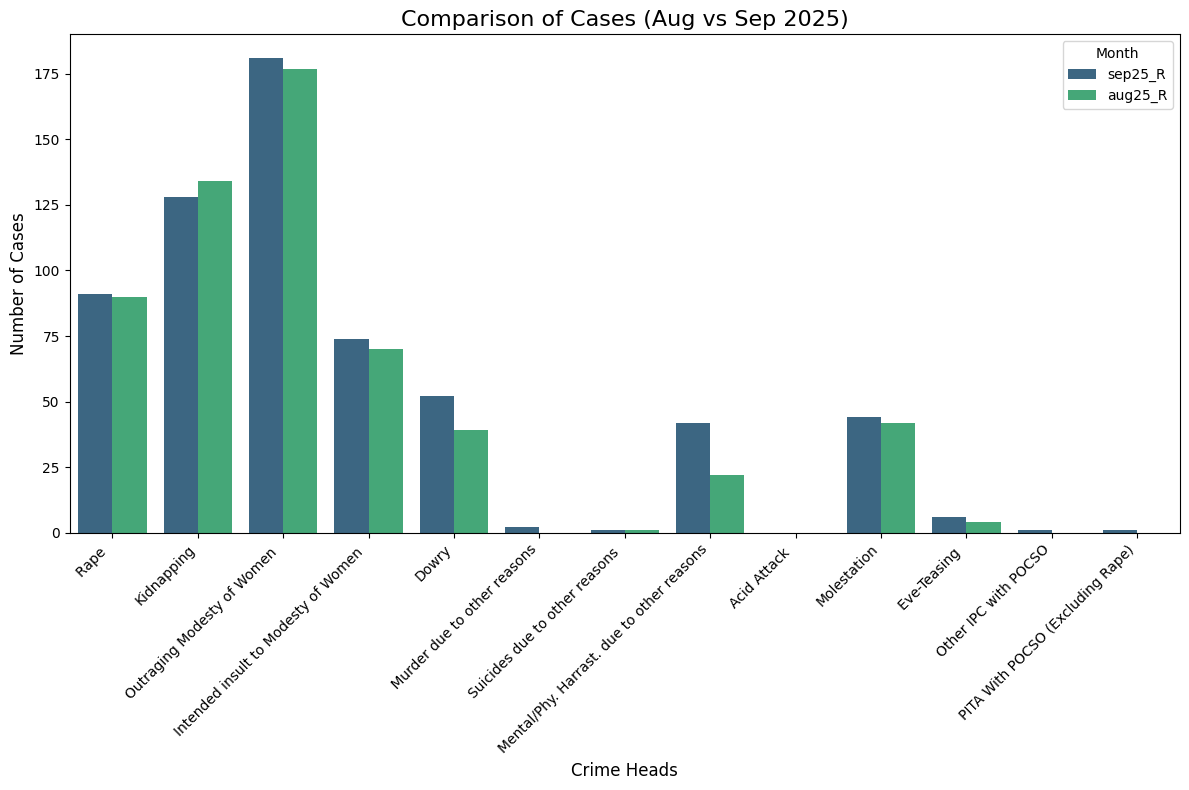

In [103]:
df2_comparison = df2[['Crime Heads', 'sep25_R', 'aug25_R']].melt('Crime Heads', var_name='Month', value_name='Number of Cases')

plt.figure(figsize=(12, 8))
sns.barplot(x='Crime Heads', y='Number of Cases', palette = 'viridis', hue='Month', data=df2_comparison)
plt.title('Comparison of Cases (Aug vs Sep 2025)', fontsize=16)
plt.xlabel('Crime Heads', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
from google.colab import files
women_comp = 'women_comp.png'
plt.savefig(women_comp)
files.download(women_comp)
plt.show()